Import Library

In [1]:
# ----- IMPORTS -----
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.metrics import silhouette_score
from operator import itemgetter

ModuleNotFoundError: No module named 'transformers'

In [4]:
# Crawl tweet
filename = 'hasil.csv'
search_keyword = 'hiu goreng until:2025-09-26 since:2025-05-26 lang:id' # topiknya (ngasal dulu)
limit = 1000
twitter_auth_token = ''

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

^C


[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@a7fcba47ef3624101fe2ae18fed91614"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@ebd5075fe9d1491c768037c91b4dc3d1"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@49c88bb4122b264f28f0a87c9dfb4124"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@0f23d3a1b742b2da8f6c9955dae382ab"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Err

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/hasil.csv, renaming to ./tweets-data/hasil.old.csv

-- Scrolling... (1) (2) (3) (4)
Filling in keywords: (perasaan sendiri or denial) until:2025-09-26 since:2025-05-26 lang:id

 (5) (6) (7)

Your tweets saved to: f:\Kuliah\VSC\Semester 5\Datmin 2\Social Media Mining\tweets-data\hasil.csv
Total tweets saved: 20

-- Scrolling... (1) (2) (3)

Your tweets saved to: f:\Kuliah\VSC\Semester 5\Datmin 2\Social Media Mining\tweets-data\hasil.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: f:\Kuliah\VSC\Semester 5\Datmin 2\Social Media Mining\tweets-data\hasil.

In [31]:
data = pd.read_csv('tweets-data/hasil.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971038680598065513,Thu Sep 25 23:51:22 +0000 2025,0,@cinamouroll Nahhhkek perasaan tu ni row 74 ke...,1971361919065096333,NaN,cinamouroll,in,NaN,0,1,0,https://x.com/undefined/status/197136191906509...,1310801928431915008,NaN
1,1970737292391424029,Thu Sep 25 23:41:16 +0000 2025,0,@mymusetxt stress bgt ya perasaan member kaga ...,1971359380236009644,NaN,mymusetxt,in,NaN,0,0,0,https://x.com/undefined/status/197135938023600...,1234097127933890560,NaN
2,1971346818861768864,Thu Sep 25 22:52:55 +0000 2025,0,Asdfghjkl takut jadi kesenengan sendiri..........,1971347209515040788,NaN,southernaive,in,NaN,0,1,0,https://x.com/undefined/status/197134720951504...,1549206721767165953,NaN
3,1971040063107760203,Thu Sep 25 22:44:40 +0000 2025,0,@holayinn Aneh banget sama perasaan gua sendiri,1971345133229703351,NaN,holayinn,in,NaN,0,0,0,https://x.com/undefined/status/197134513322970...,131420884,NaN
4,1971322836523581745,Thu Sep 25 21:16:05 +0000 2025,0,udah bisa ikhlas dengan kenyataan w akan disin...,1971322839853826172,NaN,ellengouldings,in,NaN,0,0,0,https://x.com/undefined/status/197132283985382...,1259349325752102912,NaN


In [33]:
# Cleaning text
def clean_text(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^\s]+', '', text)  # Menghapus mentions
  text = re.sub(r'[^\w\s]', '', text)  # Menghapus punctuation
  text = re.sub(r'\d+', '', text)  # Menghapus angka
  return text

data['full_text_cleaned'] = data['full_text'].apply(clean_text)

data['full_text_cleaned']

0       nahhhkek perasaan tu ni row  kek aku sendiri ...
1       stress bgt ya perasaan member kaga sebut nama...
2      asdfghjkl takut jadi kesenengan sendiri perasa...
3                  aneh banget sama perasaan gua sendiri
4      udah bisa ikhlas dengan kenyataan w akan disin...
                             ...                        
113    selalu mixed feeling tiap deket mau konser kay...
114        tapi masih g jelas sama perasaan sendiri wkwk
115    gaada temen yg matiin rasa percaya diri temenn...
116     gimana cara sea mengatasi adegan nangis  cuma...
117    kepalanya terasa berat ia mematikan ponselnya ...
Name: full_text_cleaned, Length: 118, dtype: object

In [34]:
# Menyatukan konten tweet
combined_text = ' '.join(data['full_text_cleaned'].tolist())

In [35]:
tokens = word_tokenize(combined_text)
print(tokens)

['nahhhkek', 'perasaan', 'tu', 'ni', 'row', 'kek', 'aku', 'sendiri', 'gitu', 'stress', 'bgt', 'ya', 'perasaan', 'member', 'kaga', 'sebut', 'namanya', 'tapi', 'kenapa', 'pada', 'buat', 'asumsi', 'sendiri', 'chill', 'aja', 'kenape', 'si', 'asdfghjkl', 'takut', 'jadi', 'kesenengan', 'sendiri', 'perasaan', 'nyaman', 'gak', 'semuanya', 'menyangkut', 'hal', 'romantis', 'gak', 'sih', 'nyaman', 'sebagai', 'teman', 'ngobrol', 'pun', 'bisa', 'juga', 'aneh', 'banget', 'sama', 'perasaan', 'gua', 'sendiri', 'udah', 'bisa', 'ikhlas', 'dengan', 'kenyataan', 'w', 'akan', 'disini', 'sampai', 'lulus', 'dipisahin', 'lagi', 'dengan', 'cara', 'terkocak', 'berarti', 'selama', 'ini', 'feeling', 'feeling', 'dan', 'perasaan', 'kit', 'hati', 'ngeliat', 'dy', 'begini', 'begitu', 'emang', 'sign', 'buat', 'pisah', 'kali', 'ya', 'tapi', 'w', 'denial', 'mulu', 'akuu', 'even', 'pacaran', 'aja', 'aku', 'males', 'aku', 'belum', 'siap', 'buat', 'berbagi', 'perasaan', 'takut', 'ngecewain', 'orang', 'lain', 'intinya', 'be

In [36]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_tokens = [stemmer.stem(token) for token in tokens]
print(stemmed_tokens)

['nahhhkek', 'asa', 'tu', 'ni', 'row', 'kek', 'aku', 'sendiri', 'gitu', 'stress', 'bgt', 'ya', 'asa', 'member', 'kaga', 'sebut', 'nama', 'tapi', 'kenapa', 'pada', 'buat', 'asumsi', 'sendiri', 'chill', 'aja', 'kenape', 'si', 'asdfghjkl', 'takut', 'jadi', 'neng', 'sendiri', 'asa', 'nyaman', 'gak', 'semua', 'sangkut', 'hal', 'romantis', 'gak', 'sih', 'nyaman', 'bagai', 'teman', 'ngobrol', 'pun', 'bisa', 'juga', 'aneh', 'banget', 'sama', 'asa', 'gua', 'sendiri', 'udah', 'bisa', 'ikhlas', 'dengan', 'nyata', 'w', 'akan', 'sini', 'sampai', 'lulus', 'dipisahin', 'lagi', 'dengan', 'cara', 'kocak', 'arti', 'lama', 'ini', 'feeling', 'feeling', 'dan', 'asa', 'kit', 'hati', 'ngeliat', 'dy', 'begini', 'begitu', 'emang', 'sign', 'buat', 'pisah', 'kali', 'ya', 'tapi', 'w', 'denial', 'mulu', 'akuu', 'even', 'pacar', 'aja', 'aku', 'males', 'aku', 'belum', 'siap', 'buat', 'bagi', 'asa', 'takut', 'ngecewain', 'orang', 'lain', 'inti', 'benerbener', 'ga', 'siap', 'aku', 'lebih', 'bahagia', 'sendiri', 'nder'

In [37]:
# Stopwords dengan sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stemmed_text = ' '.join(stemmed_tokens)
stopped_text = stopword.remove(stemmed_text)

# Membuat token stopped token
stopped_tokens = word_tokenize(stopped_text)

print(stopped_tokens)

['nahhhkek', 'asa', 'tu', 'ni', 'row', 'kek', 'aku', 'sendiri', 'gitu', 'stress', 'bgt', 'asa', 'member', 'kaga', 'sebut', 'nama', 'buat', 'asumsi', 'sendiri', 'chill', 'aja', 'kenape', 'si', 'asdfghjkl', 'takut', 'jadi', 'neng', 'sendiri', 'asa', 'nyaman', 'gak', 'semua', 'sangkut', 'romantis', 'gak', 'sih', 'nyaman', 'bagai', 'teman', 'ngobrol', 'aneh', 'banget', 'sama', 'asa', 'gua', 'sendiri', 'udah', 'ikhlas', 'nyata', 'w', 'sini', 'lulus', 'dipisahin', 'cara', 'kocak', 'arti', 'lama', 'feeling', 'feeling', 'asa', 'kit', 'hati', 'ngeliat', 'dy', 'begini', 'emang', 'sign', 'buat', 'pisah', 'kali', 'w', 'denial', 'mulu', 'akuu', 'even', 'pacar', 'aja', 'aku', 'males', 'aku', 'siap', 'buat', 'asa', 'takut', 'ngecewain', 'orang', 'inti', 'benerbener', 'ga', 'siap', 'aku', 'lebih', 'bahagia', 'sendiri', 'nder', 'kalo', 'sendiri', 'tuh', 'rasa', 'lebih', 'plong', 'apa', 'bohong', 'besar', 'kamu', 'hidup', 'ummm', 'bohongin', 'diri', 'sendiri', 'manipulasi', 'asa', 'minimal', 'biar', 'ta

In [38]:
final_tokens = [token for token in stopped_tokens if token not in ['yg', 'dong', 'kayak', 'aja', 'nya','kan']]
print(final_tokens)

['nahhhkek', 'asa', 'tu', 'ni', 'row', 'kek', 'aku', 'sendiri', 'gitu', 'stress', 'bgt', 'asa', 'member', 'kaga', 'sebut', 'nama', 'buat', 'asumsi', 'sendiri', 'chill', 'kenape', 'si', 'asdfghjkl', 'takut', 'jadi', 'neng', 'sendiri', 'asa', 'nyaman', 'gak', 'semua', 'sangkut', 'romantis', 'gak', 'sih', 'nyaman', 'bagai', 'teman', 'ngobrol', 'aneh', 'banget', 'sama', 'asa', 'gua', 'sendiri', 'udah', 'ikhlas', 'nyata', 'w', 'sini', 'lulus', 'dipisahin', 'cara', 'kocak', 'arti', 'lama', 'feeling', 'feeling', 'asa', 'kit', 'hati', 'ngeliat', 'dy', 'begini', 'emang', 'sign', 'buat', 'pisah', 'kali', 'w', 'denial', 'mulu', 'akuu', 'even', 'pacar', 'aku', 'males', 'aku', 'siap', 'buat', 'asa', 'takut', 'ngecewain', 'orang', 'inti', 'benerbener', 'ga', 'siap', 'aku', 'lebih', 'bahagia', 'sendiri', 'nder', 'kalo', 'sendiri', 'tuh', 'rasa', 'lebih', 'plong', 'apa', 'bohong', 'besar', 'kamu', 'hidup', 'ummm', 'bohongin', 'diri', 'sendiri', 'manipulasi', 'asa', 'minimal', 'biar', 'tahan', 'hari', 

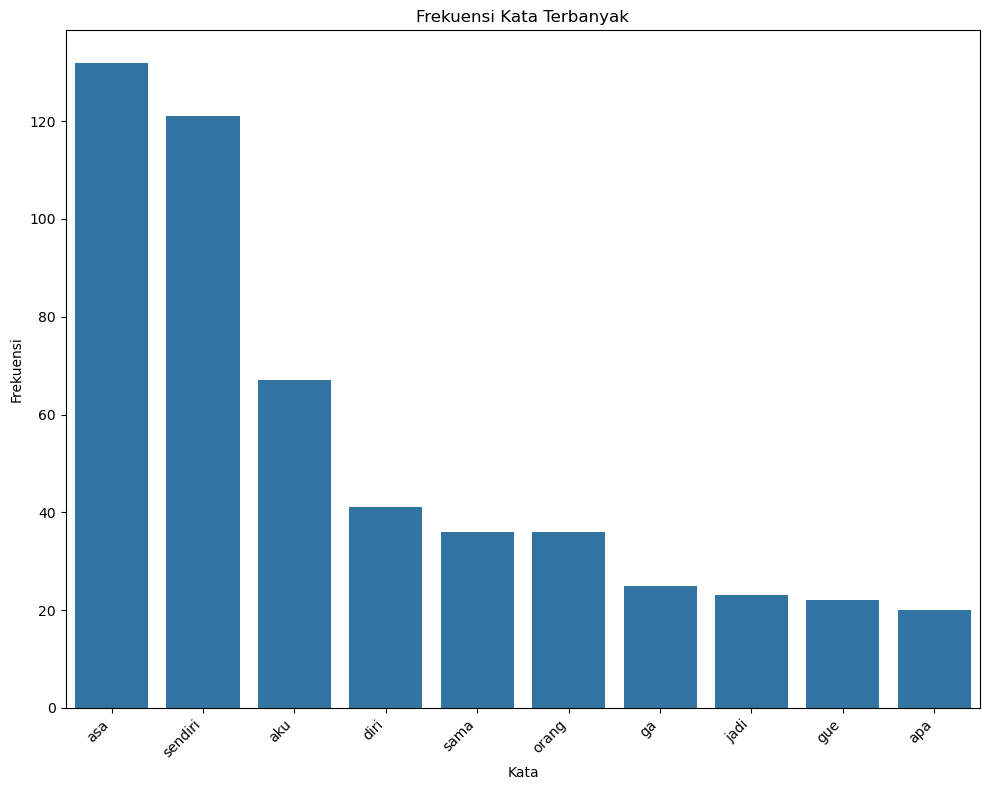

In [39]:
# Menghitung frekuensi kata
fdist = FreqDist(final_tokens)

# Mengambil 10 kata terbanyak
most_common_words = fdist.most_common(10)

# Membuat dataframe dari list tuple
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Membuat bar plot dengan seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_freq)
plt.title('Frekuensi Kata Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()

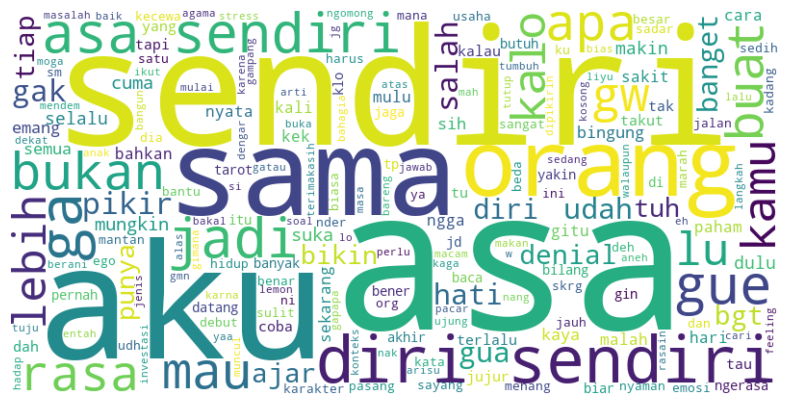

In [40]:
# Menggabungkan token menjadi teks
text = " ".join(final_tokens)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Menggabungkan token menjadi teks
text_for_clustering = final_tokens

# Membuat TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transformasi pada teks
tfidf_matrix = vectorizer.fit_transform(text_for_clustering)

# Menentukan jumlah cluster
num_clusters = 3

# Membuat model KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan clustering
kmeans.fit(tfidf_matrix)

# Mendapatkan label cluster untuk setiap dokumen
cluster_labels = kmeans.labels_

# Menampilkan hasil clustering
for i, label in enumerate(cluster_labels):
  print(f"Teks {i+1} termasuk dalam cluster {label}")

Teks 1 termasuk dalam cluster 0
Teks 2 termasuk dalam cluster 0
Teks 3 termasuk dalam cluster 0
Teks 4 termasuk dalam cluster 0
Teks 5 termasuk dalam cluster 0
Teks 6 termasuk dalam cluster 0
Teks 7 termasuk dalam cluster 0
Teks 8 termasuk dalam cluster 0
Teks 9 termasuk dalam cluster 0
Teks 10 termasuk dalam cluster 0
Teks 11 termasuk dalam cluster 0
Teks 12 termasuk dalam cluster 0
Teks 13 termasuk dalam cluster 0
Teks 14 termasuk dalam cluster 0
Teks 15 termasuk dalam cluster 0
Teks 16 termasuk dalam cluster 0
Teks 17 termasuk dalam cluster 0
Teks 18 termasuk dalam cluster 0
Teks 19 termasuk dalam cluster 0
Teks 20 termasuk dalam cluster 0
Teks 21 termasuk dalam cluster 0
Teks 22 termasuk dalam cluster 0
Teks 23 termasuk dalam cluster 0
Teks 24 termasuk dalam cluster 0
Teks 25 termasuk dalam cluster 0
Teks 26 termasuk dalam cluster 0
Teks 27 termasuk dalam cluster 0
Teks 28 termasuk dalam cluster 0
Teks 29 termasuk dalam cluster 0
Teks 30 termasuk dalam cluster 0
Teks 31 termasuk da

In [42]:
# Menampilkan jumlah data per cluster

cluster_counts = pd.Series(cluster_labels).value_counts()

print(f"Total number of data points: {len(cluster_labels)}")
print(f"Total number of clusters: {len(cluster_counts)}")
print("\nData per cluster:")
print(cluster_counts)

Total number of data points: 2818
Total number of clusters: 3

Data per cluster:
0    2800
1      10
2       8
Name: count, dtype: int64


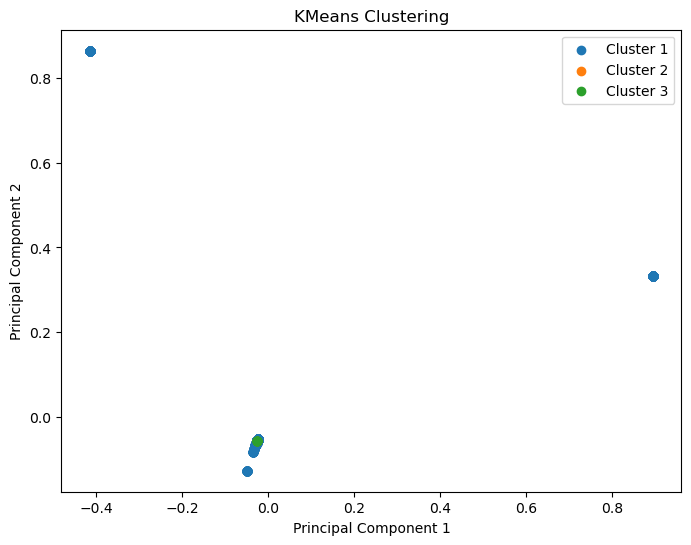

In [43]:
# Menampilkan hasil cluster dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
  cluster_data = reduced_data[cluster_labels == i]
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

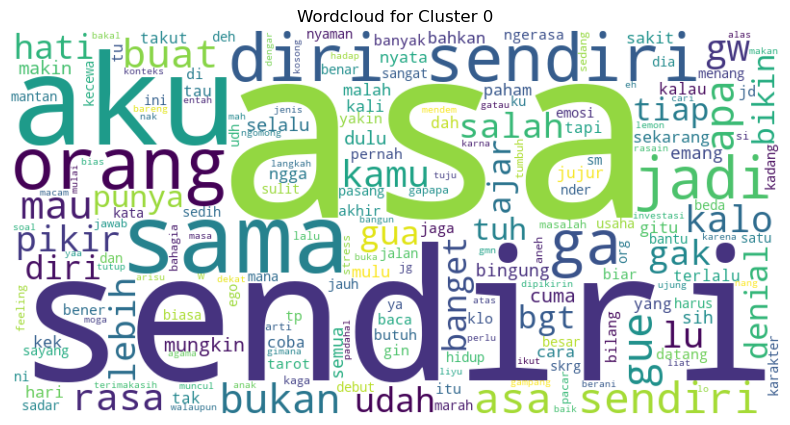

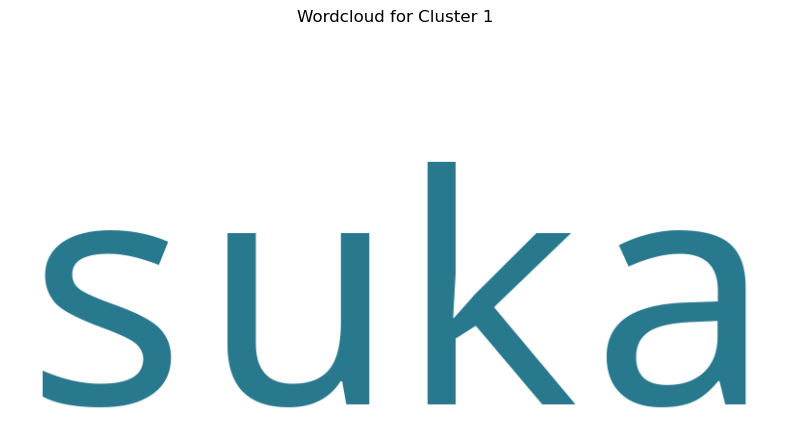

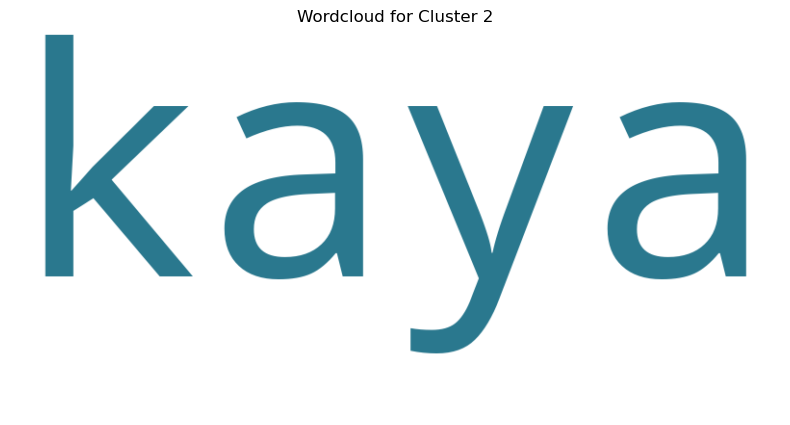

In [44]:
for cluster_num in range(num_clusters):
  cluster_tokens = [token for i, token in enumerate(final_tokens) if cluster_labels[i] == cluster_num]
  cluster_text = " ".join(cluster_tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Wordcloud for Cluster {cluster_num}')
  plt.axis("off")
  plt.show()

In [45]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.014449629244977735


In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

# Perform sentiment analysis
data['sentiment'] = data['full_text_cleaned'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if x else 'Neutral')

# Print hasil sentiment
print(data[['full_text_cleaned', 'sentiment']])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                     full_text_cleaned sentiment
0     nahhhkek perasaan tu ni row  kek aku sendiri ...  NEGATIVE
1     stress bgt ya perasaan member kaga sebut nama...  NEGATIVE
2    asdfghjkl takut jadi kesenengan sendiri perasa...  NEGATIVE
3                aneh banget sama perasaan gua sendiri  NEGATIVE
4    udah bisa ikhlas dengan kenyataan w akan disin...  NEGATIVE
..                                                 ...       ...
113  selalu mixed feeling tiap deket mau konser kay...  NEGATIVE
114      tapi masih g jelas sama perasaan sendiri wkwk  NEGATIVE
115  gaada temen yg matiin rasa percaya diri temenn...  NEGATIVE
116   gimana cara sea mengatasi adegan nangis  cuma...  NEGATIVE
117  kepalanya terasa berat ia mematikan ponselnya ...  NEGATIVE

[118 rows x 2 columns]


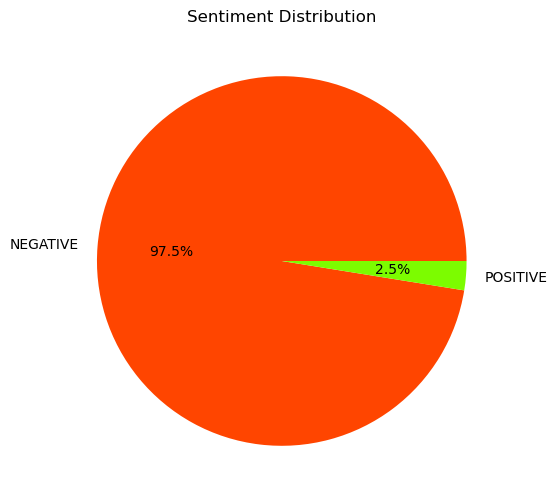

In [47]:
# Menghitung sentimet
sentiment_counts = data['sentiment'].value_counts()

# Membuat Piechart sentiment
plt.figure(figsize=(8, 6))
plt.pie(x=sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['orangered', 'lawngreen'])
plt.title('Sentiment Distribution')
plt.show()

In [48]:
# Tweet dengan sentiment positive
positive_tweets = data[data['sentiment'] == 'POSITIVE']
positive_tweets

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_cleaned,sentiment
92,1971063641249345893,Thu Sep 25 04:06:07 +0000 2025,0,just.. let it flow... selalu cari distraksi sa...,1971063641249345893,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197106364124934...,1957312954317307904,NaN,just let it flow selalu cari distraksi sampai ...,POSITIVE
94,1971053279783358559,Thu Sep 25 03:24:56 +0000 2025,0,Wow album lil fantasy chaeyeong udah 1jt-an pe...,1971053279783358559,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197105327978335...,1313639475541536768,NaN,wow album lil fantasy chaeyeong udah jtan pend...,POSITIVE
106,1970889353015755004,Wed Sep 24 16:33:33 +0000 2025,17,Eh genius bgt sih pas di bridge ini kan lirikn...,1970889353015755004,https://pbs.twimg.com/media/G1oBa-RawAAbiiL.jpg,NaN,in,NaN,3,1,4,https://x.com/undefined/status/197088935301575...,1372485804937777152,NaN,eh genius bgt sih pas di bridge ini kan lirikn...,POSITIVE


In [49]:
# Initialize a directed graph
G_mention = nx.DiGraph()

# Loop through each row in the DataFrame
for r in data.iterrows():
    author = r[1]['username']
    author = f'@{author}'
    text = r[1]['full_text']

    try:
        # Convert 'created_at' column to datetime
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        # If timestamp parsing fails, skip this row
        continue

    # Use regular expressions to extract mentions
    mentions = set(re.findall(r"@(\w+)", text))

    # Add the users if there are any mentioned in the text
    if len(mentions) > 0:
        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)


In [50]:
# Centrality measures
graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))


print("centrality measures:", graph_centrality)
print("closeness centrality:", graph_closeness)
print("betweenness centrality:", graph_betweenness)
print("max degree:", max_de)
print("max closeness:", max_clo)
print("max betweenness:", max_bet)

centrality measures: {'@nan': 1.0, '@cinamouroll': 0.02857142857142857, '@mymusetxt': 0.02857142857142857, '@holayinn': 0.02857142857142857, '@baseconvo': 0.02857142857142857, '@feylings': 0.02857142857142857, '@jorddcn': 0.02857142857142857, '@kimjunmyeonofc': 0.02857142857142857, '@choocoovanillaa': 0.02857142857142857, '@marsmlep': 0.02857142857142857, '@skyyymint': 0.02857142857142857, '@tanyarlfes': 0.02857142857142857, '@WapangLakah': 0.02857142857142857, '@jamesseaan': 0.02857142857142857, '@munvess': 0.02857142857142857, '@takterjajah': 0.02857142857142857, '@anfess_': 0.02857142857142857, '@tianxvuning': 0.02857142857142857, '@alattusho2nd': 0.02857142857142857, '@_flavoriester': 0.02857142857142857, '@BanyuSadewa': 0.02857142857142857, '@yourcloudnin3': 0.02857142857142857, '@ottherism': 0.02857142857142857, '@winteuuw': 0.02857142857142857, '@yongte_': 0.02857142857142857, '@tanyakanrl': 0.02857142857142857, '@arteuris': 0.02857142857142857, '@sertifixat': 0.0285714285714285

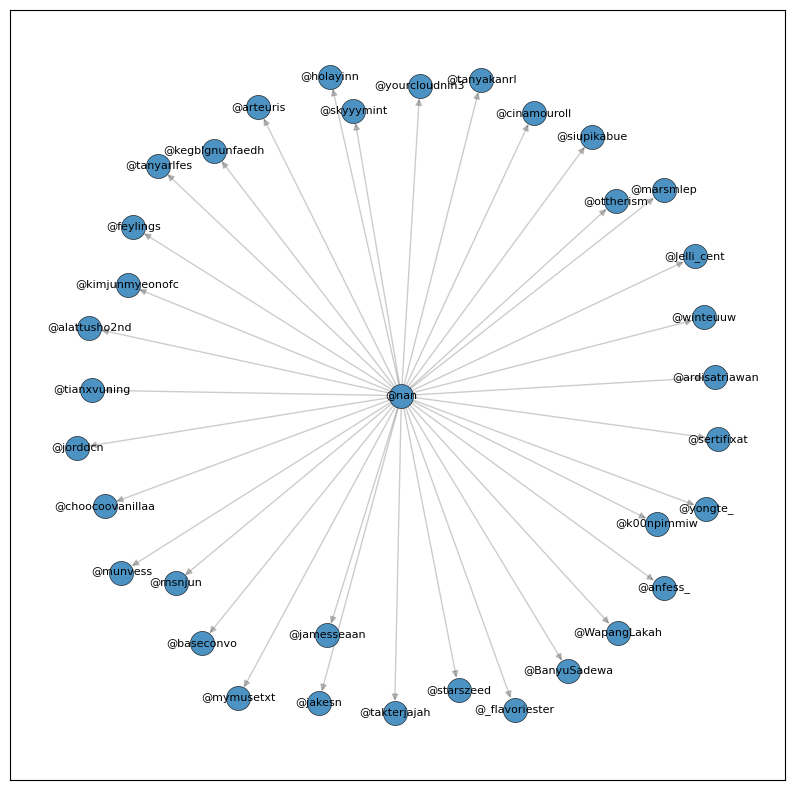

In [51]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt # Import the matplotlib library


# Assuming 'G_mention' from ipython-input-73-43702a354e30 is the intended graph
# Turn DataFrame into a graph
G = G_mention

# Specify layout for visualization
pos = nx.spring_layout(G)

# Create a plot with specified style and size
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

# Draw the nodes and set node properties
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')

# Draw the labels and edges
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

# Show the plot
plt.show()

In [52]:
# Analyze the most central nodes (users) in the network
degree_centrality = nx.degree_centrality(G_mention)
betweenness_centrality = nx.betweenness_centrality(G_mention)
closeness_centrality = nx.closeness_centrality(G_mention)

# Find the top 5 users with the highest degree centrality (most connections)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest betweenness centrality (most bridging connections)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest closeness centrality (closest to other nodes)
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 users by degree centrality:")
for node, centrality in top_degree_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by betweenness centrality:")
for node, centrality in top_betweenness_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by closeness centrality:")
for node, centrality in top_closeness_nodes:
    print(f"{node}: {centrality}")

# Identify potential discussion starters (users with early tweets)
data['created_at'] = pd.to_datetime(data['created_at'])
earliest_tweets = data.nsmallest(5, 'created_at')
discussion_starters = set(earliest_tweets['username'])

print("\nPotential discussion starters:")
for user in discussion_starters:
    print(user)


Top 5 users by degree centrality:
@nan: 1.0
@cinamouroll: 0.02857142857142857
@mymusetxt: 0.02857142857142857
@holayinn: 0.02857142857142857
@baseconvo: 0.02857142857142857

Top 5 users by betweenness centrality:
@nan: 0.0
@cinamouroll: 0.0
@mymusetxt: 0.0
@holayinn: 0.0
@baseconvo: 0.0

Top 5 users by closeness centrality:
@cinamouroll: 0.02857142857142857
@mymusetxt: 0.02857142857142857
@holayinn: 0.02857142857142857
@baseconvo: 0.02857142857142857
@feylings: 0.02857142857142857

Potential discussion starters:
nan
nan
nan
nan
nan


C:\Users\Arwen\AppData\Local\Temp\ipykernel_18428\3223804752.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'])
